In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [61]:
def plot_power_law(values, title='power law fit check', figsize=(5,5)):
    dc_min, dc_max = min(values), max(values)
    X = np.logspace(np.log10(dc_min), np.log10(dc_max), 50) # generate log distributed x values
    Y = [len([dc for dc in values if dc <= x]) for x in X] # cumulative sum

    lnX, lnY = np.log(X), np.log(Y)
    regr = LinearRegression().fit(lnX.reshape(-1,1), lnY)
    lnY_pred = regr.predict(lnX.reshape(-1,1))

    _, ax = plt.subplots(figsize=figsize)
    ax.plot(lnX, lnY, 'r.')
    ax.plot(lnX, lnY_pred, 'b')

    ax.set_title(title)
    plt.show()

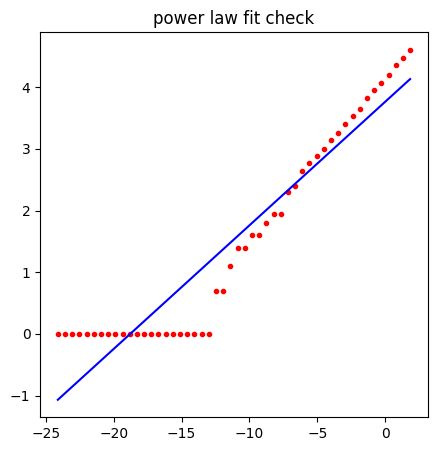

In [63]:
sigma = 5.78e-8
X_lin = np.linspace(1, 100, 100)
error = 0.02*X_lin + np.random.randn(100)
values = sigma * (X_lin + error)**4

plot_power_law(values)

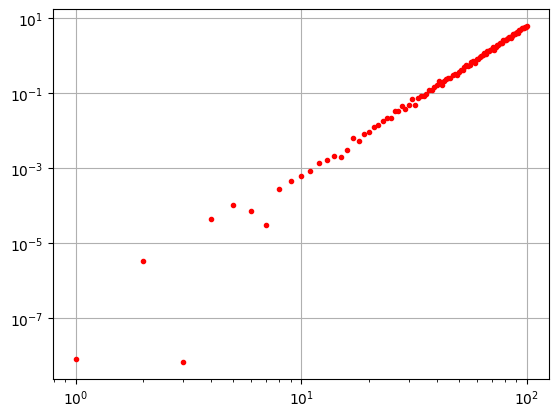

In [3]:
plt.loglog(X, Y, "r.")
plt.grid()
plt.show()

In [7]:
lnX = np.log(X)
lnY = np.log(Y)
b, lna = np.polyfit(lnX, lnY, 1)
a = np.exp(lna)
print(f"power = {b:.2e}, sigma = {a:.2e}")

power = 4.24e+00, sigma = 2.45e-08


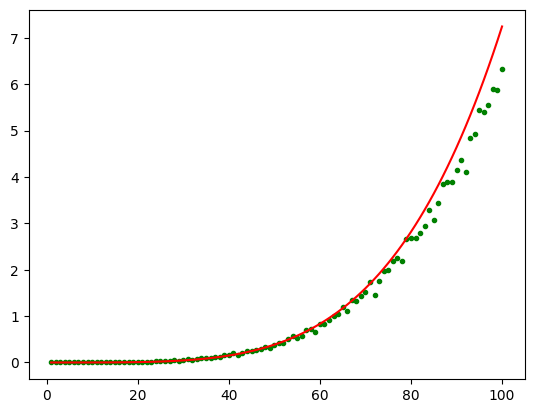

In [9]:
plt.plot(X, Y, "g.")
plt.plot(X, a*X**b, 'r')
plt.show()